In [54]:
# Import necessary libraries
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit_aer import Aer
from qiskit.visualization import plot_histogram
from qiskit.quantum_info import Statevector
import matplotlib.pyplot as plt
import numpy as np
import os

In [55]:
def create_circuit():
    """Create the quantum circuit with specified gates"""
    qr = QuantumRegister(2, 'q')
    cr = ClassicalRegister(2, 'c')
    qc = QuantumCircuit(qr, cr)
    
    # Apply gates in sequence
    qc.h(qr[0])
    qc.cx(qr[0], qr[1])
    qc.z(qr[1])
    qc.cx(qr[1], qr[0])
    qc.h(qr[1])
    qc.measure(qr, cr)
    
    return qc, qr, cr

In [56]:
def create_circuit_with_input(input_state):
    """Create circuit with specific input state"""
    qr = QuantumRegister(2, 'q')
    cr = ClassicalRegister(2, 'c')
    qc = QuantumCircuit(qr, cr)
    
    # Initialize input state
    if input_state == '01':
        qc.x(qr[1])
    elif input_state == '10':
        qc.x(qr[0])
    elif input_state == '11':
        qc.x(qr[0])
        qc.x(qr[1])
    
    # Apply the sequence of gates
    qc.h(qr[0])
    qc.cx(qr[0], qr[1])
    qc.z(qr[1])
    qc.cx(qr[1], qr[0])
    qc.h(qr[1])
    
    qc.measure(qr, cr)
    return qc

TWO-QUBIT QUANTUM CIRCUIT ANALYSIS
Visualizations will be saved to: quantum_circuit_visualizations/

Circuit Diagram:


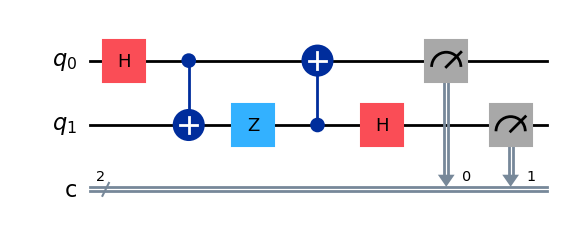

     ┌───┐          ┌───┐     ┌─┐   
q_0: ┤ H ├──■───────┤ X ├─────┤M├───
     └───┘┌─┴─┐┌───┐└─┬─┘┌───┐└╥┘┌─┐
q_1: ─────┤ X ├┤ Z ├──■──┤ H ├─╫─┤M├
          └───┘└───┘     └───┘ ║ └╥┘
c: 2/══════════════════════════╩══╩═
                               0  1 
✓ Circuit diagram saved as: quantum_circuit_visualizations/circuit_diagram.png


In [57]:
# Create output directory for saving visualizations
output_dir = "quantum_circuit_visualizations"
os.makedirs(output_dir, exist_ok=True)

print("=" * 70)
print("TWO-QUBIT QUANTUM CIRCUIT ANALYSIS")
print("=" * 70)
print(f"Visualizations will be saved to: {output_dir}/")

# Create and display the circuit
qc, qr, cr = create_circuit()
print("\nCircuit Diagram:")
display(qc.draw(output='mpl'))
print(qc.draw(output='text'))

# Save circuit diagram
circuit_diagram = qc.draw(output='mpl')
circuit_diagram.savefig(f"{output_dir}/circuit_diagram.png", dpi=300, bbox_inches='tight')
print(f"✓ Circuit diagram saved as: {output_dir}/circuit_diagram.png")

In [58]:
print("\n" + "=" * 70)
print("TESTING ALL POSSIBLE INPUT STATES")
print("=" * 70)

# All possible 2-qubit input states
input_states = ['00', '01', '10', '11']
all_results = {}
simulator = Aer.get_backend('qasm_simulator')

# Test each input state
for input_state in input_states:
    print(f"\n{'='*70}")
    print(f"Input State: |{input_state}>")
    print(f"{'='*70}")
    
    # Create circuit with specific input
    qc_with_input = create_circuit_with_input(input_state)
    
    # Run simulation
    job = simulator.run(qc_with_input, shots=1024)
    result = job.result()
    counts = result.get_counts(qc_with_input)
    
    # Store results
    all_results[input_state] = counts
    
    # Display results for this input
    print(f"\nMeasurement Results:")
    for state, count in sorted(counts.items(), reverse=True):
        percentage = (count / 1024) * 100
        bar = '█' * int(percentage / 2)
        print(f"  |{state}>: {count:4d} ({percentage:5.2f}%) {bar}")


TESTING ALL POSSIBLE INPUT STATES

Input State: |00>

Measurement Results:
  |10>: 1024 (100.00%) ██████████████████████████████████████████████████

Input State: |01>

Measurement Results:
  |11>: 1024 (100.00%) ██████████████████████████████████████████████████

Input State: |10>

Measurement Results:
  |00>: 1024 (100.00%) ██████████████████████████████████████████████████

Input State: |11>

Measurement Results:
  |01>: 1024 (100.00%) ██████████████████████████████████████████████████


In [59]:
print("\n" + "=" * 70)
print("INPUT-OUTPUT TRUTH TABLE")
print("=" * 70)
print(f"{'Input':<10} | {'Output':<10} | {'Probability':<12}")
print("-" * 70)

# Create truth table
for input_state in input_states:
    counts = all_results[input_state]
    for output_state, count in sorted(counts.items(), reverse=True):
        percentage = (count / 1024) * 100
        if percentage > 0.1:  # Only show outputs with >0.1% probability
            print(f"|{input_state}>{' '*6} | |{output_state}>{' '*6} | {percentage:5.2f}%")


INPUT-OUTPUT TRUTH TABLE
Input      | Output     | Probability 
----------------------------------------------------------------------
|00>       | |10>       | 100.00%
|01>       | |11>       | 100.00%
|10>       | |00>       | 100.00%
|11>       | |01>       | 100.00%



Generating and saving visualizations...
✓ Individual histograms saved as: quantum_circuit_visualizations/individual_histograms.png


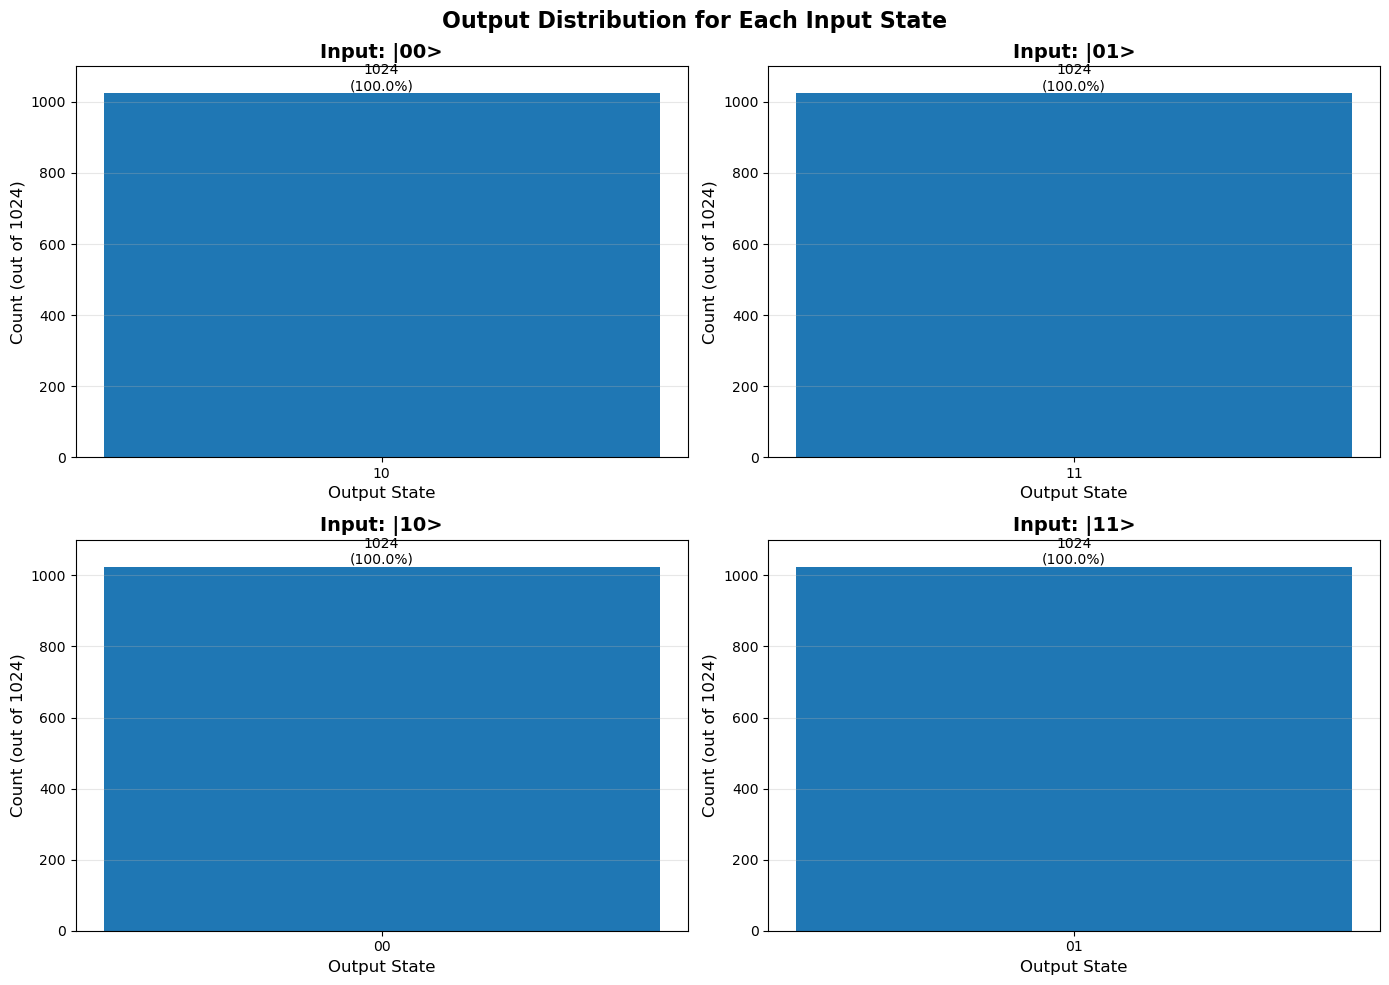

In [60]:
# Visualization 1: Individual histograms for each input
print("\n" + "=" * 70)
print("Generating and saving visualizations...")
print("=" * 70)

fig1, axes1 = plt.subplots(2, 2, figsize=(14, 10))
fig1.suptitle('Output Distribution for Each Input State', fontsize=16, fontweight='bold')

for idx, input_state in enumerate(input_states):
    ax = axes1[idx // 2, idx % 2]
    counts = all_results[input_state]
    
    states = list(counts.keys())
    values = list(counts.values())
    
    bars = ax.bar(states, values, color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728'][:len(states)])
    ax.set_title(f'Input: |{input_state}>', fontsize=14, fontweight='bold')
    ax.set_xlabel('Output State', fontsize=12)
    ax.set_ylabel('Count (out of 1024)', fontsize=12)
    ax.set_ylim(0, 1100)
    ax.grid(axis='y', alpha=0.3)
    
    # Add value labels on bars
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height,
                f'{int(height)}\n({height/1024*100:.1f}%)',
                ha='center', va='bottom', fontsize=10)

plt.tight_layout()

# Save Visualization 1
fig1.savefig(f"{output_dir}/individual_histograms.png", dpi=300, bbox_inches='tight')
print(f"✓ Individual histograms saved as: {output_dir}/individual_histograms.png")

✓ Combined comparison saved as: quantum_circuit_visualizations/combined_comparison.png


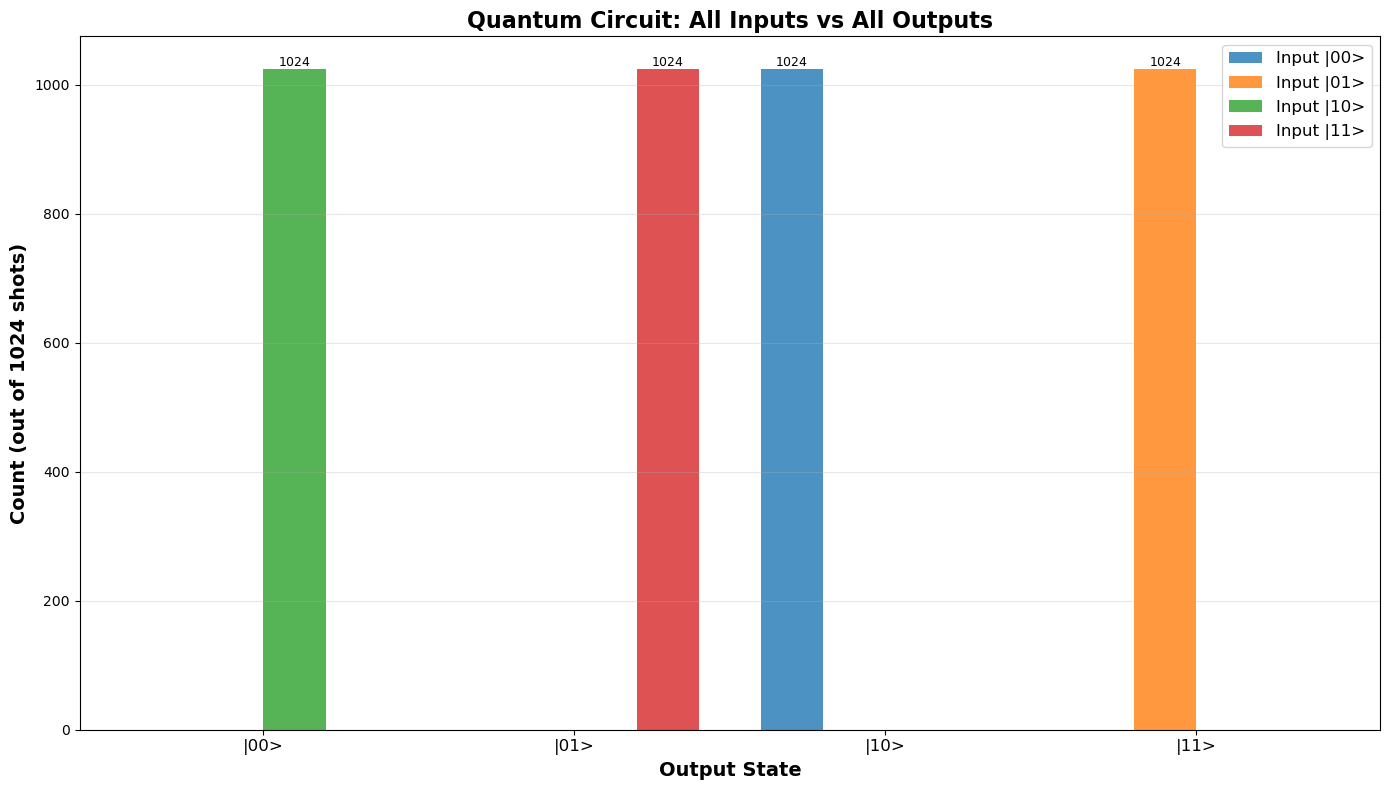

In [61]:
# Visualization 2: Combined comparison
fig2, ax2 = plt.subplots(figsize=(14, 8))

# Prepare data for grouped bar chart
output_states = ['00', '01', '10', '11']
x = np.arange(len(output_states))
width = 0.2

colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']

for idx, input_state in enumerate(input_states):
    counts = all_results[input_state]
    values = [counts.get(out, 0) for out in output_states]
    offset = width * (idx - 1.5)
    bars = ax2.bar(x + offset, values, width, label=f'Input |{input_state}>', 
                   color=colors[idx], alpha=0.8)
    
    # Add value labels
    for bar in bars:
        height = bar.get_height()
        if height > 0:
            ax2.text(bar.get_x() + bar.get_width()/2., height,
                    f'{int(height)}',
                    ha='center', va='bottom', fontsize=9)

ax2.set_xlabel('Output State', fontsize=14, fontweight='bold')
ax2.set_ylabel('Count (out of 1024 shots)', fontsize=14, fontweight='bold')
ax2.set_title('Quantum Circuit: All Inputs vs All Outputs', fontsize=16, fontweight='bold')
ax2.set_xticks(x)
ax2.set_xticklabels([f'|{s}>' for s in output_states], fontsize=12)
ax2.legend(fontsize=12)
ax2.grid(axis='y', alpha=0.3)
plt.tight_layout()

# Save Visualization 2
fig2.savefig(f"{output_dir}/combined_comparison.png", dpi=300, bbox_inches='tight')
print(f"✓ Combined comparison saved as: {output_dir}/combined_comparison.png")

✓ Heatmap saved as: quantum_circuit_visualizations/heatmap.png


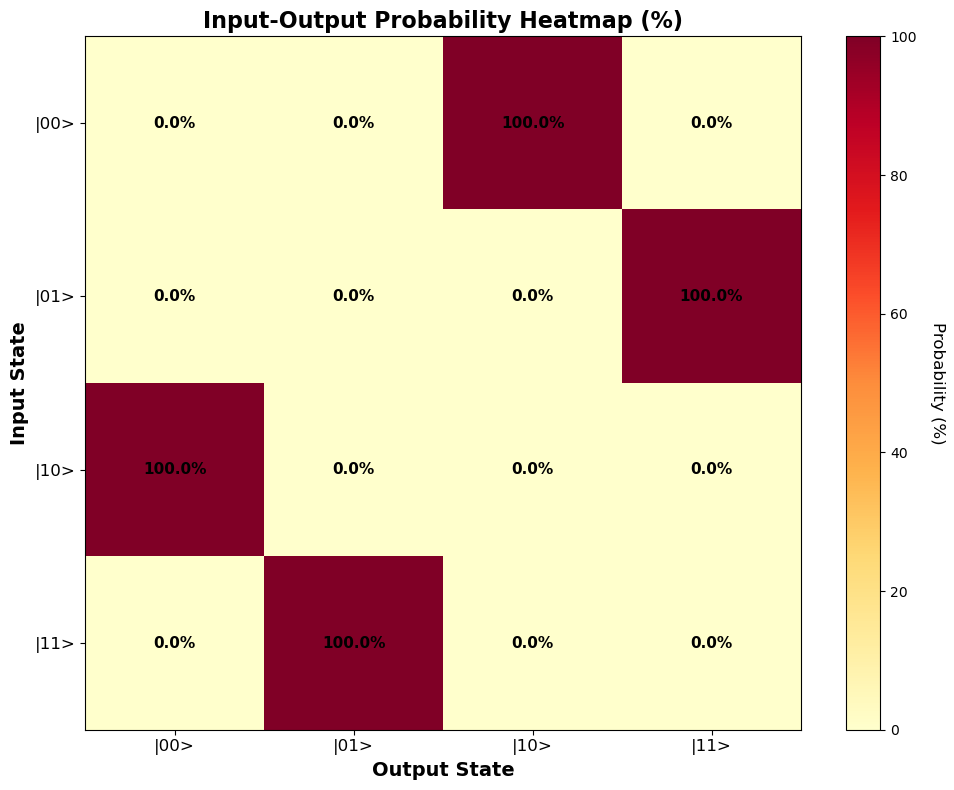

In [71]:
# Visualization 3: Heatmap of input-output mapping
fig3, ax3 = plt.subplots(figsize=(10, 8))

# Create matrix for heatmap
matrix = np.zeros((4, 4))
for i, input_state in enumerate(input_states):
    counts = all_results[input_state]
    for j, output_state in enumerate(output_states):
        matrix[i][j] = counts.get(output_state, 0) / 1024 * 100

im = ax3.imshow(matrix, cmap='YlOrRd', aspect='auto', vmin=0, vmax=100)

# Set ticks and labels
ax3.set_xticks(np.arange(len(output_states)))
ax3.set_yticks(np.arange(len(input_states)))
ax3.set_xticklabels([f'|{s}>' for s in output_states], fontsize=12)
ax3.set_yticklabels([f'|{s}>' for s in input_states], fontsize=12)

ax3.set_xlabel('Output State', fontsize=14, fontweight='bold')
ax3.set_ylabel('Input State', fontsize=14, fontweight='bold')
ax3.set_title('Input-Output Probability Heatmap (%)', fontsize=16, fontweight='bold')

# Add text annotations
for i in range(len(input_states)):
    for j in range(len(output_states)):
        text = ax3.text(j, i, f'{matrix[i, j]:.1f}%',
                       ha="center", va="center", color="black", fontsize=11, fontweight='bold')

# Add colorbar
cbar = plt.colorbar(im, ax=ax3)
cbar.set_label('Probability (%)', rotation=270, labelpad=20, fontsize=12)

plt.tight_layout()

# Save Visualization 3
fig3.savefig(f"{output_dir}/heatmap.png", dpi=300, bbox_inches='tight')
print(f"✓ Heatmap saved as: {output_dir}/heatmap.png")

# Show all plots
plt.show()